<a href="https://colab.research.google.com/github/jerrycyng/Customer-Behaviour-Prediction-with-Machine-Learning-and-SHAP-Interpretation/blob/main/Banking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
## Data Preparation

In [5]:
#Import relevant libaries 
import numpy as np
import pandas as pd
import xgboost
import matplotlib.pyplot as plt

In [10]:
#Import dataset from google drive 
from google.colab import drive
drive.mount('/content/drive')
path ="/content/drive/MyDrive/Bank.csv"
df_bank= pd.read_csv(path)

Mounted at /content/drive


In [11]:
df_bank= df_bank.drop(columns= 'Unnamed: 0')
df_bank= df_bank.drop(columns= 'Unnamed: 21')

In [12]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
#Dataset Attribute
print(df_bank.shape)
df_bank.info()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

In [14]:
newcols = []
for col in list(df_bank.columns):
    if col not in ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
        newcols.append(col)
newcols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [16]:
df_bank = df_bank.dropna()
# import LabelEncoder from sklearn preprocessing sub module
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the categorical variable origin
cols = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']
for col in cols:
    df_bank[col] = le.fit_transform(df_bank[col])

This is the datset after label encoding. 

In [17]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [18]:
# extract all the independent variables from the dataset except the variable - name
features = df_bank.drop(['y'], axis = 1)

# extract the target variable - df_bank
target = df_bank['y']

In [19]:
# import train_test_split from sklearn model_selection sub module
from sklearn.model_selection import train_test_split

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 31)


## Model Building

In the part, we are going to hypertune our machine learning parameters by GridSearchCV and find out the optimal parameters for our model. 

The variables will be explained as below,  

1. Colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

2. learning_rate controls how much to change the model in response to the estimated error each time the model weights are updated.

3. max_depth is the number of trees you want to build before taking the maximum voting or averages of predictions.

4. Subsample is the ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.

5. n_estimators is the number of trees we want to build before taking the maximum voting or averages of predictions.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost
clf_temp= xgboost.XGBClassifier().fit(X_train, y_train)
param_grid = { 
    'colsample_bytree':[.75,1],
    'learning_rate':[0.01,0.05,0.1,0.3,0.5],
    'max_depth':[1,2,3,5],
    'subsample':[.75,1],
    'n_estimators': list(range(50, 400, 50))
}
grid_search = GridSearchCV(estimator=clf_temp, scoring='roc_auc', param_grid=param_grid)
grid_result = grid_search.fit(X_train, y_train)
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}','\n')

Best: 0.9497959506787744 using {'colsample_bytree': 0.75, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.75} 



These are the optimal parameters for the model. In the below, we are going to train the model by these parameters. 

In [21]:
clf= xgboost.XGBClassifier(base_score= np.mean(y_train),subsample= 0.75,objective='binary:logistic', max_depth= 5,colsample_bylevel= 0.75,n_estimators=250, eta= 0.05).fit(X_train, y_train)

Model prediction and its accuracy 

In [23]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.10%


# Model explainability

In [25]:
import shap
# intialize the shap
shap.initjs()

In [26]:
# use shap Explainer and pass the best estimator and the test features
explainer = shap.TreeExplainer(clf, X_test)
# pass the test features into the above explainer to compute shap values
shap_values = explainer(X_test)

 99%|===================| 8144/8238 [01:10<00:00]       

## Shap Feature Importance: Global Importance

The global importance of each feature has been taken to be the mean absolute value for that feature in all given samples.

In this example, the feature 'duration' has the highest average impact to the prediction.

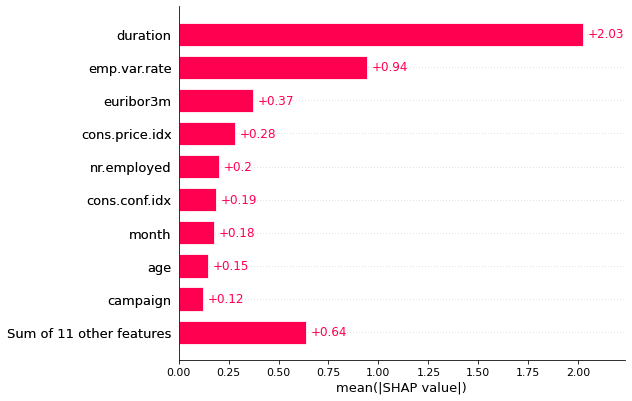

In [30]:
# create shap bar plot
shap.plots.bar(shap_values)

## SHAP Summary Plot
The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

100%|===================| 8216/8238 [01:10<00:00]       

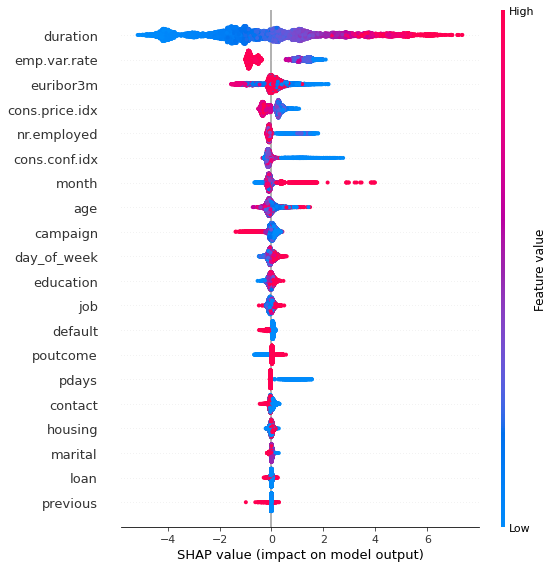

In [31]:
# create shap summary plot
shap.summary_plot(explainer.shap_values(X_test), X_test)

## Simplified SHAP Summary Plot

To make it easier to observe, I have made a 2D version for the summary plot. 

In the below, red implies a positive relationship between the feature and the term deposit probability while blue represents a reverse relatioship.  

Let's take 'duration' as an example, longer the last contact duration, higher the chance the client has subscribed a term deposit. 

For the Euribor3M, higher the 3 month Euro Interbank Offered Rate, lower the chance for the client to subscribe a term deposit. 

 99%|===================| 8176/8238 [01:10<00:00]       

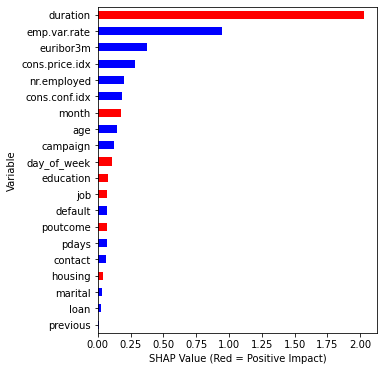

In [33]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(list(df_shap))
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
    
ABS_SHAP(explainer.shap_values(X_test),X_test) 

## Shap Feature Importance: Local Importance

Local importance is to analyze how much does each feature impacts the prediction in different rows. 

Despite of analyzing the same feature, results can vary a lot as well. 
In this example, for the first observation, 'duration' has a negative impact to the prediction.

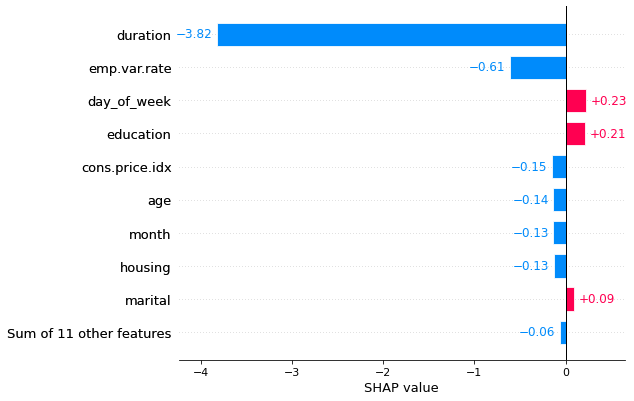

In [51]:
# Shap bar plot for the first observation
shap.plots.bar(shap_values[0])

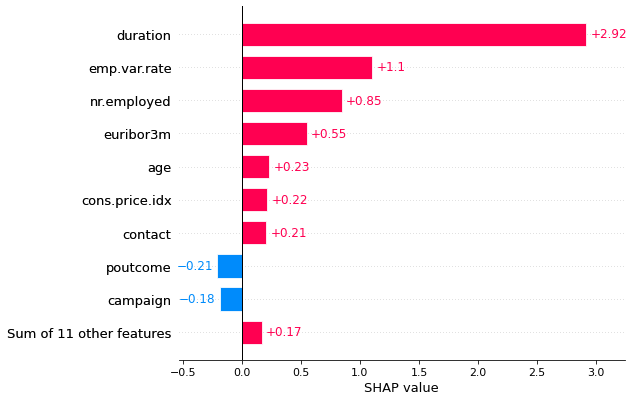

In [52]:
# Shap bar plot for the second observation
shap.plots.bar(shap_values[1])

From the above results, we can observe differernt rows of record can have a big contrast despite of having the same feature. 

## SHAP Force Plot
It helps to visualize the given SHAP values with an additive force layout.

For the features with red, the prediction has been pushed up. 

For the features with blue, the prediciton has been pushed down. 




In [38]:
# create force plot for the 1st observation
shap.initjs()
shap.force_plot(shap_values[0,:], X_train.iloc[0,:], link='logit')

In [57]:
# create force plot for the 201th observation
shap.initjs()
shap.force_plot(shap_values[200,:], X_train.iloc[200,:], link='logit')

# Depedence Plot

In [44]:
s_value = explainer.shap_values(X_test)

 99%|===================| 8152/8238 [01:10<00:00]       

The most correlated feature will be automatically selected by SHAP to demonstrate the interaction between two features. 

For example, when we plot a dependence plot for age, 'cons.price.idx' will be automatically selected. 

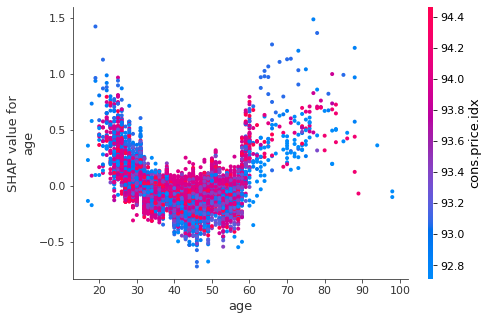

In [46]:
shap.dependence_plot('age', s_value, X_test)

We can also choose a specific feature to interact with and plot. 

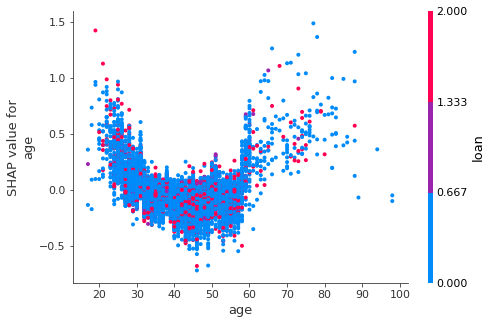

In [47]:
shap.dependence_plot('age', s_value, X_test, interaction_index="loan")